# Classification de textes à l'aide de pyspark ML

## Introduction
<p>
<div style="text-align: justify">
Le traitement du langage naturel NLP est l'un des processus importants pour les équipes de science des données à travers 
le monde. Avec des données en constante augmentation, la plupart des organisations ont déjà migré vers 
des plateformes de Big Data comme Apache Hadoop et des offres cloud comme AWS, Azure et GCP. Ces plates-formes sont plus que 
capables de gérer le Big Data, ce qui permet aux organisations d'effectuer des analyses à grande échelle pour des données non 
structurées telles que la catégorisation de texte. Mais en matière d'apprentissage automatique, il existe toujours un fossé 
entre les systèmes de mégadonnées et les outils d'apprentissage automatique.<br>
Les bibliothèques python d'apprentissage automatique populaires telles que scikit-learn et 
Gensim sont hautement optimisées pour fonctionner sur des machines à nœud unique et ne sont pas conçues 
pour les environnements distribués. <b class="keywords">Apache Spark MLlib</b> est l'un des nombreux outils qui aident à combler cette lacune en offrant
la plupart des modèles d'apprentissage automatique comme la régression linéaire, la régression logistique, SVM, Random Forest, 
K-means, SVM et bien d'autres pour effectuer les tâches d'apprentissage automatique les plus courantes.<br>
Le Traitement Automatique du Langage naturel (TAL) ou Natural Language Processing (NLP) en anglais trouve de nombreuses 
applications dans la vie de tous les jours:
 <ul>
    <li>Traduction de texte</li>
    <li>Correcteur orthographique</li>
    <li>Résumé automatique d’un contenu</li>
    <li>Synthèse vocale</li>
    <li>Analyse d’opinion/sentiment</li>
    <li>Prédiction du prochain mot sur smartphone</li>
    <li>Extraction des entités nommées depuis un texte</li>
    <li>…</li>
</ul>
 </div>
 </p>

## Qu'est-ce que Spark NLP ?
<p>
<div style="text-align: justify">
Spark NLP est une bibliothèque open-source, lancée il y a un peu plus de 4 ans, dans le but de fournir un NLP de pointe à 
la communauté open-source, offrant des bibliothèques et des API complètes en Python, Java et Scala. Évolué à la suite de la 
croissance de l'apprentissage en profondeur dans les technologies NLP et de l'optimisation d'Apache Spark, il permet de faire 
fonctionner les choses d'un ou deux ordres de grandeur plus rapidement sur le même matériel pour les bibliothèques basées sur 
Spark.
</div>
</p>
<p>
<div>
De plus, il est construit directement sur Spark ML, ce qui signifie qu'un pipeline Spark NLP est de la même classe qu'une construction de pipeline Spark ML, 
offrant ainsi une série d'avantages.
</div>
</p>

## Description de problèmatique :
<p>
<div style="text-align: justify">
Twitter est devenu un canal de communication important en cas d’urgence.<br>
L’omniprésence des smartphones permet aux gens d’annoncer une urgence qu’ils observent en temps réel. Pour cette raison, 
de plus en plus d’agences sont intéressées par la surveillance programmatique de Twitter (c’est-à-dire les organisations 
de secours en cas de catastrophe et les agences de presse).Mais, il n’est pas toujours clair si les mots d’une personne 
annoncent réellement une catastrophe.<br><br>
Dans cette compétition, nous sommes mis au défi de construire un modèle d’apprentissage automatique qui prédit quels Tweets 
concernent de vraies catastrophes et lesquels ne le sont pas. Nous aurons accès à un ensemble de données de 10 000 tweets 
classés à la main: <a href='https://www.kaggle.com/c/nlp-getting-started/overview'>Link of Dataset</a>
</div>
</p>

### Qu'est-ce qu'on prédit ?
Nous prédisons si un tweet donné concerne une véritable catastrophe ou non. Si oui, prédisez un 1. Si non, prédisez un 0.

### Columns
<p>
Les colonnes incluses dans cet ensemble de données sont :
<ul>
<li><b class="keywords">id:</b> Cette colonne comprend des identifiants pour chaque tweets </li>
<li><b class="keywords">keyword:</b> Keyword de ce tweet (peut être vide) </li>
<li><b class="keywords">location:</b> Lieu d'où le tweet a été envoyé (peut aussi être vide) </li>
<li><b class="keywords">text:</b> Le texte d'un tweet </li>
<li><b class="keywords">target:</b> Dans le fichier train.csv uniquement, cela indique si un tweet concerne une véritable 
catastrophe (1) ou non (0)</li></ul>
</p>

## Importation des bibliothèques nécessaires

In [3]:
import numpy as np 
import pandas as pd 
from pyspark.sql import SparkSession
from pyspark.ml.feature import CountVectorizer,StringIndexer, RegexTokenizer,StopWordsRemover
from pyspark.sql.functions import col,regexp_replace
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## Création d'une session spark
<p>
<div style="text-align: justify">
La création d'une session spark est le point d'entrée de Spark ML. C'est l'un des tout premiers objets que nous créons en 
réalisant un projet Spark ML.  nous créons un SparkSession en utilisant la méthode SparkSession.builder (qui nous donne accès à 
l'API Builder que nous utilisons pour configurer la session).
</div>
</p>

In [4]:
spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "8g") \
    .appName("NLP") \
    .getOrCreate()

In [5]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

## Importation de Dataset

In [22]:
dataset = spark.read.csv('train_data.csv', inferSchema=True, header=True)
dataset.printSchema()

root
 |-- id: string (nullable = true)
 |-- keyword: string (nullable = true)
 |-- location: string (nullable = true)
 |-- text: string (nullable = true)
 |-- target: integer (nullable = true)



**Predictor variables:** id, keyword, location, text

**Outcome variable:** target

Voyons à quoi ressemblent les données:<br>
Pandas data frame est meilleur que la fonction Spark DataFrame show(), pour cela nous utiliserons Pandas DataFrame

In [26]:
import pandas as pd
pd.DataFrame(dataset.take(5), columns=dataset.columns)

,id,keyword,location,text,target
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1
1,4,None,None,Forest fire near La Ronge Sask. Canada,1
2,5,None,None,All residents asked to 'shelter in place' are ...,1
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
print("Data Record Count:",dataset.count())

Data Record Count: 8387


Visualisation de **'target'** (Outcome column)

In [28]:
dataset.toPandas().groupby(['target']).size()

target
0.0    4095
1.0    3081
dtype: int64

Les données sont bien équilibrées.

# I. Prétraitement des données

<p>
<div style="text-align: justify">
Une étape essentielle dans la fouille des données textuelles est la préparation des données collectées afin
qu’elles puissent être efficacement traitées par les algorithmes d’apprentissage machine. Il contient de deux parties
La partie de <b class="keywords">nettoyage des donnees</b> qui consiste en un certain nombre de prétraitements qui visent à standardiser et nettoyer 
le contenu des tweets qui sont archivés :
<ul>
<li>Suppression des valeurs nulles</li>
<li>Suppression des chiffres dans les tweets</li>
<li>Séparation des mots du tweet</li>
<li>Suppression des mots vides de sens</li>
<li>Vectorisation</li>
</ul>
</div>
</p>
<p>
<div style="text-align: justify">
Et la deuxième partie de <b class="keywords">séparation des données en train et validation data.</b>
</div>
</p>
<p>
<div style="text-align: justify">
Pré-traitement est une étape qui cherche à standardiser du texte afin de rendre son usage plus facile. C'est le processus de 
conversion des données en quelque chose qu'un ordinateur peut comprendre. 
</div>
</p>

In [29]:
dataset = dataset.select("id","text","target")
dataset.show(5)

+---+--------------------+------+
| id|                text|target|
+---+--------------------+------+
|  1|Our Deeds are the...|     1|
|  4|Forest fire near ...|     1|
|  5|All residents ask...|     1|
|  6|13,000 people rec...|     1|
|  7|Just got sent thi...|     1|
+---+--------------------+------+
only showing top 5 rows



## I.1. Nettoyage des donnees
<p>
<div style="text-align: justify">
Le nettoyage des données est un processus qui vise à identifier et corriger les données altérées, inexactes ou non pertinentes. 
Cette étape fondamentale du traitement des données améliore la cohérence, fiabilité et valeur des données.
</div>
</p>

### Suppression des valeurs nulles
<p>
<b class="keywords">drop :</b> est une fonction utilisée pour supprimer des lignes avec des valeurs NULL dans les colonnes de notre DataFrame
</p>

In [30]:
dataset = dataset.dropna()
print("Data Record Count:",dataset.count())

Data Record Count: 7176


### Suppression des chiffres dans les tweets
<p>
<div style="text-align: justify">
Les textes des tweets contiennent de nombreux chiffres qui nous pouvons les supprimer on utilise la fonction Spark
<b class="keywords">regexp_replace</b>, qui permet en général de remplacer une valeur de colonne par une chaîne pour une autre 
chaîne/sous-chaîne.
</div>
</p>

In [31]:
dataset = dataset.withColumn("only_str",regexp_replace(col('text'), '\d+', ''))
dataset.show(5)

+---+--------------------+------+--------------------+
| id|                text|target|            only_str|
+---+--------------------+------+--------------------+
|  1|Our Deeds are the...|     1|Our Deeds are the...|
|  4|Forest fire near ...|     1|Forest fire near ...|
|  5|All residents ask...|     1|All residents ask...|
|  6|13,000 people rec...|     1|, people receive ...|
|  7|Just got sent thi...|     1|Just got sent thi...|
+---+--------------------+------+--------------------+
only showing top 5 rows



### Séparation des mots du tweet
<p>
<div style="text-align: justify">
Le but de ce prétraitement est d’extraire d’un texte brut les différents mots le composant afin de pouvoir les
analyser séparément. Cette étape est un préalable pour de nombreux traitements comme la lemmatisation.
nous avons utilisé la fonction Spark <b class="keywords">RegexTokenizer</b> pour cette étape particulière. c'est une bonne option pour le faire.
</div>
</p>

In [32]:
regex_tokenizer = RegexTokenizer(inputCol="only_str", outputCol="words", pattern="\\W")
raw_words = regex_tokenizer.transform(dataset)
raw_words.show(5)

+---+--------------------+------+--------------------+--------------------+
| id|                text|target|            only_str|               words|
+---+--------------------+------+--------------------+--------------------+
|  1|Our Deeds are the...|     1|Our Deeds are the...|[our, deeds, are,...|
|  4|Forest fire near ...|     1|Forest fire near ...|[forest, fire, ne...|
|  5|All residents ask...|     1|All residents ask...|[all, residents, ...|
|  6|13,000 people rec...|     1|, people receive ...|[people, receive,...|
|  7|Just got sent thi...|     1|Just got sent thi...|[just, got, sent,...|
+---+--------------------+------+--------------------+--------------------+
only showing top 5 rows



### Suppression des mots vides de sens
<p>
<div style="text-align: justify">
Le but de ce prétraitement est de supprimer les mots qui n’ont pas de signification particulière comme des
conjonctions (ex : and, are, our, ...) et qui peuvent être ignorés. </p>
</p>
</div>
<p>
<div style="text-align: justify">
nous avons utilisé la fonction Spark <b class="keywords">StopWordsRemover</b> pour supprimer ces mots vides de sens (stopWords)
que les mots apparaissent fréquemment et n'ont pas autant de sens. Spark <b class="keywords">StopWordsRemover</b> prend en entrée une séquence 
de chaînes. Ensuite, il supprime tous les mots vides des séquences d'entrée.
</div>
</p>

In [33]:
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
words_df = remover.transform(raw_words)
words_df.select("id","words","target","filtered").show(5, truncate=20)

+---+--------------------+------+--------------------+
| id|               words|target|            filtered|
+---+--------------------+------+--------------------+
|  1|[our, deeds, are,...|     1|[deeds, reason, e...|
|  4|[forest, fire, ne...|     1|[forest, fire, ne...|
|  5|[all, residents, ...|     1|[residents, asked...|
|  6|[people, receive,...|     1|[people, receive,...|
|  7|[just, got, sent,...|     1|[got, sent, photo...|
+---+--------------------+------+--------------------+
only showing top 5 rows



### Vectorisation
<p>
<div style="text-align: justify">
La représentation vectorielle des données vise à transformer l’ensemble des textes des tweets sous la forme
de vecteurs afin qu’ils puissent être traités par les méthodes de fouille conçues pour des données vectorielles.
</div>
</p>
<p>
<div style="text-align: justify">
<b class="keywords">CountVectorizer :</b> fonctionnent sur le nombre de mots (jetons). Il utilise des mots dans des documents 
texte pour créer des vecteurs contenant le nombre de jetons. Il prévoit l'utilisation d'un dictionnaire de mots pour 
identifier les jetons qui peuventêtre pris en entrée d'algorithmes.
CountVectorizer compte les fréquences de mots pour le document, c'est un outil utilisé pour convertir le texte en vecteur.
</div>
</p>

In [34]:
cv = CountVectorizer(inputCol="filtered", outputCol="features")
model = cv.fit(words_df)
countVectorizer_train = model.transform(words_df)
countVectorizer_train = countVectorizer_train.withColumn("label",col('target'))
countVectorizer_train.show(10)

+---+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+
| id|                text|target|            only_str|               words|            filtered|            features|label|
+---+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+
|  1|Our Deeds are the...|     1|Our Deeds are the...|[our, deeds, are,...|[deeds, reason, e...|(19663,[24,65,148...|    1|
|  4|Forest fire near ...|     1|Forest fire near ...|[forest, fire, ne...|[forest, fire, ne...|(19663,[7,100,140...|    1|
|  5|All residents ask...|     1|All residents ask...|[all, residents, ...|[residents, asked...|(19663,[156,578,9...|    1|
|  6|13,000 people rec...|     1|, people receive ...|[people, receive,...|[people, receive,...|(19663,[11,23,156...|    1|
|  7|Just got sent thi...|     1|Just got sent thi...|[just, got, sent,...|[got, sent, photo...|(19663,[32,102,15...|    1|
|  8|#Ro

In [35]:
countVectorizer_train.select('text','words','filtered','features','target').show()

+--------------------+--------------------+--------------------+--------------------+------+
|                text|               words|            filtered|            features|target|
+--------------------+--------------------+--------------------+--------------------+------+
|Our Deeds are the...|[our, deeds, are,...|[deeds, reason, e...|(19663,[24,65,148...|     1|
|Forest fire near ...|[forest, fire, ne...|[forest, fire, ne...|(19663,[7,100,140...|     1|
|All residents ask...|[all, residents, ...|[residents, asked...|(19663,[156,578,9...|     1|
|13,000 people rec...|[people, receive,...|[people, receive,...|(19663,[11,23,156...|     1|
|Just got sent thi...|[just, got, sent,...|[got, sent, photo...|(19663,[32,102,15...|     1|
|#RockyFire Update...|[rockyfire, updat...|[rockyfire, updat...|(19663,[7,23,284,...|     1|
|#flood #disaster ...|[flood, disaster,...|[flood, disaster,...|(19663,[17,121,17...|     1|
|I'm on top of the...|[i, m, on, top, o...|[m, top, hill, se...|(19663

## I.2. Séparation des données en train et validation data
<p>
<div style="text-align: justify">
Cette étape consiste en la création de deux jeux de données qui seront utilisés pour l’entrainement et la
mesure de performance des différents modèles sélectionnés. Pour maximiser la performance des modèles
prédictifs, nous avons opté pour une séparation aléatoire des tweets avec une proportion de 80% des données
réservées à la phase d’entrainement et de 20% des données réservées pour la mesure de performance des
modèles.
<ul>
<li>L'ensemble de données d'entrainement: 80%</li>
<li>L'ensemble de données pour le test: 20%</li>
</ul>
Pour cela <b class="keywords">randomSplit</b> nous permet de diviser de manière transparente les données en ensembles
d'entraînement et de test.
</div>
</p>

In [36]:
(train, validate) = countVectorizer_train.randomSplit([0.8, 0.2], seed = 123)

In [37]:
train

DataFrame[id: string, text: string, target: int, only_str: string, words: array<string>, filtered: array<string>, features: vector, label: int]

In [38]:
validate

DataFrame[id: string, text: string, target: int, only_str: string, words: array<string>, filtered: array<string>, features: vector, label: int]

# II. Machine Learning: Modèles de prédiction
<p>
<div style="text-align: justify">
Nous avons  préparé notre ensemble de données et les diviser en ensembles d'apprentissage (training) et de test (testing). 
Il est maintenant temps de choix du modèle d'analyse.<br>
Choisir un modèle revient à choisir l’algorithme à utiliser pour construire le modèle. Il existe de nombreux
algorithmes d'apprentissage machine et plusieurs d’entre eux seront testés et comparés afin de trouver le
meilleur modèle.
</div>
</p>
<p>
<div style="text-align: justify">
Ces algorithmes peuvent être catégorisés selon le mode d’apprentissage et le type du problème traité :
<ul>
<li>Apprentissage supervisé (supervised learning)</li>
<li>Apprentissage non supervisé (unsupervised learning)</li>
<li>Apprentissage par renforcement (reinforcement learning)</li>
</ul>
</div>
</p>
<p>
<div style="text-align: justify">
Pour ce projet, le choix s’est porté sur l’apprentissage supervisé qui est particulièrement bien adapté à la
prédiction de résultats en s’aidant d’une base de données déjà étiquetés.
</div>    
</p>
<p>
<div style="text-align: justify">
On distingue ensuite au niveau de l’apprentissage supervisé deux types d’algorithmes, selon que la variable
à prédire est quantitative ou qualitative :
<ul>
<li>Les algorithmes de régression : Ils sont adaptés aux problèmes pour lesquels le résultat à prédire est une valeur
numérique.</li>
<li>Les algorithmes de classification : Ils tentent d’affecter une étiquette à une observation faite sur un ensemble de variables.
L’ensemble des valeurs possibles pour cette étiquette doit être dénombrable et défini au préalable.</li>
</ul>
</div>
</p>
<p>
<div style="text-align: justify">
Pour ce projet, la variable de sortie est qualitative (tweet concerne une véritable catastrophe, non concerne une véritable catastrophe). nous avons donc choisi 
de tester des algorithmes de classification parmi ceux qui sont disponibles dans la librairie Spark MLlib afin de bénéficier
du passage à l’échelle de Spark. Le choix s’est porté sur les algorithmes suivants qui sont compatibles avec
la classification binaire et qui sont décrits brièvement dans la suivante:
<ul>
<li>Naïves Bayes</li>
<li>Régression Logistique</li>
<li>Arbres de Décision</li>
<li>Forêts Aléatoires (Random Forest)</li>
<li>Gradient Boosting</li>
<li>SVM Support vector machine</li>
</ul>
</div>
</p>
<p>
<div style="text-align: justify">
Il est rare qu’un seul modèle suffise à produire de bonnes prédictions pour l’ensemble des données.
Nous avons donc testé la combinaison de plusieurs modèles qui permet souvent d’améliorer la performance
globale de prédiction des modèles sous-jacents.
</div>
</p>

## II.1 Les grandes étapes pour chacun algorithmes:

### Entrainement des modèles
<p>
<div style="text-align: justify">
Cette étape a pour objectif d’appliquer un modèle d’apprentissage aux données d’entrainement selon le
processus suivant :
<ul>
<li>Définition d’un pipeline pour le modèle concerné: Spark permet de définir des pipelines qui sont des flux de travail 
qui enchaînent différentes étapes de traitement des données se trouvant dans des DataFrames. </li>
<li>Définition des hyperparamètres du modèle: Chaque algorithme d’apprentissage comporte un certain nombre de paramètres 
qui permettent d’optimiser la performance du modèle sélectionné.</li>
<li>Entrainement et optimisation du modèle: L’apprentissage du modèle sur le jeu de données d’entrainement s’effectue par 
    la fonction Spark fit avec en paramètres le jeu de données concerné.</li>
</ul>
</div>
</p>

### Prédictions et évaluations des Résultats
<p>Cette étape consiste à évaluer chacun des modèles sur les même données de validation afin de trouver le
modèle ayant les meilleures performances pour la prédiction si un tweet donné concerne une véritable catastrophe ou non.</p>
<p><b class="keywords">Prédiction des modèles:</b>
Une fois qu’un modèle est entrainé, il est possible d’appliquer ce modèle sur de nouvelles données en utilisant
la fonction Spark <b class="keywords">transform</b>. Les prédictions obtenues sur le jeu de validation permettent de mesurer la
performance de généralisation de chacun des modèles.
</p>

<p>
<b class="keywords">Evaluation des modèles:</b> L’évaluation d’un modèle consiste à mesurer les écarts entre les prédictions du modèle et les résultats
attendus. Spark propose les mesures suivantes pour les algorithmes de classification:<b class="keywords"> Precision - Recall - Accuracy </b>
</p>

<p>
<b class="keywords">Ce qui nous importe, c'est l'accuracy par ce qu'est une mesure qui représente le
pourcentage de prédictions correctes de l’algorithme.</b>
</p>

### II.1.1.  Naïves Bayes

**Entrainement de modèle**

In [39]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(modelType="multinomial", labelCol="target", featuresCol="features")
nbModel = nb.fit(train)

**Prédiction et évaluation de Résultat**

In [44]:
nbPreds = nbModel.transform(validate)
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
nb_accuracy = evaluator.evaluate(nbPreds)
print("Accuracy of NaiveBayes is = %g"% (nb_accuracy))

Accuracy of NaiveBayes is = 0.796832


In [45]:
nbPreds.show()

+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|   id|                text|target|            only_str|               words|            filtered|            features|label|       rawPrediction|         probability|prediction|
+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|  100|http://t.co/GKYe6...|     0|http://t.co/GKYeg...|[http, t, co, gky...|[http, co, gkyegj...|(19663,[0,1,5,48,...|    0|[-104.57791354425...|[0.89216727127805...|       0.0|
|10004|@GreenLacey GodsL...|     0|@GreenLacey GodsL...|[greenlacey, gods...|[greenlacey, gods...|(19663,[0,1,5,8,1...|    0|[-136.13100590483...|[0.00793554609896...|       1.0|
|10010|Want Twister Tick...|     0|Want Twister Tick...|[want, twister, t...|[want, twister, t...|(19663,

### II.1.2. Régression Logistique

**Entrainement de modèle**

In [46]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'target', maxIter=10)
lrModel = lr.fit(train)

**Prédiction et évaluation de Résultat**

In [47]:
lrPreds = lrModel.transform(validate)
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lrPreds)
print("Accuracy of Logistic Regression is = %g"% (lr_accuracy))

Accuracy of Logistic Regression is = 0.782369


### II.1.3. Arbres de Décision

**Entrainement de modèle**

In [48]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'target', maxDepth = 3)
dtModel = dt.fit(train)

**Prédiction et évaluation de Résultat**

In [49]:
dtPreds = dtModel.transform(validate)
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
dt_accuracy = evaluator.evaluate(dtPreds)
print("Accuracy of Decision Trees is = %g"% (dt_accuracy))

Accuracy of Decision Trees is = 0.652204


### II.1.4. Forêts Aléatoires (Random Forest)

**Entrainement de modèle**

In [50]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'target')
rfModel = rf.fit(train)

**Prédiction et évaluation de Résultat**

In [51]:
rfPreds = rfModel.transform(validate)
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
rf_accuracy = evaluator.evaluate(rfPreds)
print("Accuracy of Random Forests is = %g"% (rf_accuracy))

Accuracy of Random Forests is = 0.597796


### II.1.5. Gradient Boosting

**Entrainement de modèle**

In [52]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)

**Prédiction et évaluation de Résultat**

In [53]:
gbtPreds = gbtModel.transform(validate)
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
gb_accuracy = evaluator.evaluate(gbtPreds)
print("Accuracy of GBT is = %g"% (gb_accuracy))

Accuracy of GBT is = 0.674931


### II.1.6. SVM Support vector machine

**Entrainement de modèle**

In [55]:
from pyspark.ml.classification import LinearSVC

svm = LinearSVC(maxIter=10, regParam=0.1, featuresCol = 'features', labelCol = 'target')
svmModel = rf.fit(train)

**Prédiction et évaluation de Résultat**

In [56]:
svmPreds = rfModel.transform(validate)
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
svm_accuracy = evaluator.evaluate(svmPreds)
print("Accuracy of SVM is = %g"% (svm_accuracy))

Accuracy of SVM is = 0.597796


# Comparaison de la performance des modèles

Text(0.5, 1.0, 'Accuracy of Models')

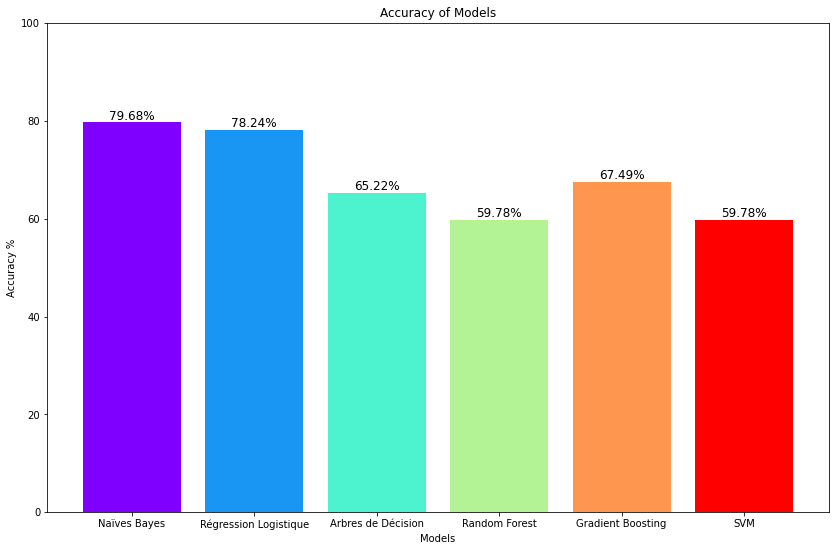

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow

Models = ['Naïves Bayes','Régression Logistique','Arbres de Décision','Random Forest','Gradient Boosting','SVM']
Accuracy = [nb_accuracy*100,lr_accuracy*100,dt_accuracy*100,rf_accuracy*100,gb_accuracy*100,svm_accuracy*100]

colors = rainbow(np.linspace(0, 1, len(Models)))

plt.figure(figsize=(14,9))
plt.bar(Models, Accuracy, color = colors)
for i in range(len(Models)):
    plt.text(i, Accuracy[i], "{:.2f}%".format(Accuracy[i]), ha='center', va='bottom' ,size=12)
plt.ylim([0,100])
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Accuracy of Models')

# Conclusion
<H3>
<p>
<div style="text-align: justify">
<ul>
<li>Le meilleur modèle est basé sur Naïves Bayes. Ce modèle obtient en effet le
meilleur taux de classification pour les données de validation avec plus de 79% de bonnes prédictions.</li><br>
<li>Le pire modèle est basé sur Random Forest et SVM. Ce résultat montre les capacités relativement
faibles de prédiction de ce type d’algorithme.</li><br>
<li>Le meilleur modèle pour ce projet est celui dont les prévisions sont les plus proches des résultats attendus et
qui permet le passage à l’échelle: Naïves Bayes et Régression Logistique sont des bonnes options pour ce projet.</li><br>
<li>Mais nous pouvons combiner les meilleurs modèles trouvés dans l'étape précédente afin d'améliorer la
performance globale de prédiction de ces modèles.</li><br>
</ul>
</div>
</p>
</H3>